<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint5/Module1/JDS_SHR_211_guided_project_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BloomTech Data Science

In [32]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
import sys
from sklearn.linear_model import LinearRegression

In [6]:
if 'google.colab' in sys.modules:
  # If you're on Colab:
  DATA_PATH = 'https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/'

else:
  # if you're working locally:
  DATA_PATH = '..../data/'


# I. Wrangle Data

In [3]:
df = pd.read_csv(DATA_PATH + 'condos/tribeca.csv')

In [7]:
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,,,,,
2019-01-03,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,10013.0,1840.0,1909.0,2800000
2019-01-07,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,10004.0,1759.0,NaN,2650000
2019-01-09,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,10004.0,1190.0,2005.0,1005000
2019-01-10,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,NaN,1088.0,2006.0,1678000
2019-01-11,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,10280.0,873.0,NaN,1380000


In [8]:
# check if we can del neighborhood & building class category because theyre all the same
df['NEIGHBORHOOD'].value_counts()

TRIBECA    90
Name: NEIGHBORHOOD, dtype: int64

In [9]:
df['BUILDING_CLASS_CATEGORY'].value_counts()

13 CONDOS - ELEVATOR APARTMENTS    90
Name: BUILDING_CLASS_CATEGORY, dtype: int64

In [10]:
# Wrangle function to Clean up data

def wrangle(filepath):
  # Load the csv file, convert the date column to a datetime object and set it as index.
  df = pd.read_csv(filepath,
                   parse_dates=['SALE_DATE'],  # always parse it to a date/time object when you have date data
                   index_col=['SALE_DATE'],    # set sale date as the index column
                   na_values=[0.0])            # set na

  # drop constant columns
  df.drop(columns=['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY'], inplace=True)  # so dataframe is updated in this line with inplace=True

  # Drop high-cardinality categorical columns (HCCC's), aka a categorical column that has a large number of unique values
  df.drop(columns=['ADDRESS', 'APARTMENT_NUMBER'], inplace=True)

  return df

df = wrangle(DATA_PATH + 'condos/tribeca.csv')


In [11]:
df.head()

,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,
2019-01-03,10013.0,1840.0,1909.0,2800000
2019-01-07,10004.0,1759.0,NaN,2650000
2019-01-09,10004.0,1190.0,2005.0,1005000
2019-01-10,NaN,1088.0,2006.0,1678000
2019-01-11,10280.0,873.0,NaN,1380000


# II. Split Data

Split our dataset into a **feature matrix `X`** and a **target vector `y`**.

In [12]:
# Split into feature matrix X and target vector y

X = df[['GROSS_SQUARE_FEET']]    # because it has to be implemented into the model as a 2D matrix, we need to use [[ ]]
y = df['SALE_PRICE']

In [13]:
X.shape, y.shape

((90, 1), (90,))

In [14]:
X.head()

,GROSS_SQUARE_FEET
SALE_DATE,
2019-01-03,1840.0
2019-01-07,1759.0
2019-01-09,1190.0
2019-01-10,1088.0
2019-01-11,873.0


In [15]:
y.head()

SALE_DATE
2019-01-03    2800000
2019-01-07    2650000
2019-01-09    1005000
2019-01-10    1678000
2019-01-11    1380000
Name: SALE_PRICE, dtype: int64

# III. Establish Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [16]:
print('Mean sale price:', y.mean())

Mean sale price: 3928736.3666666667


In [22]:
# create an array / list of mean values
y_baseline_pred = [y.mean()] * len(y)
y_baseline_pred

[3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666

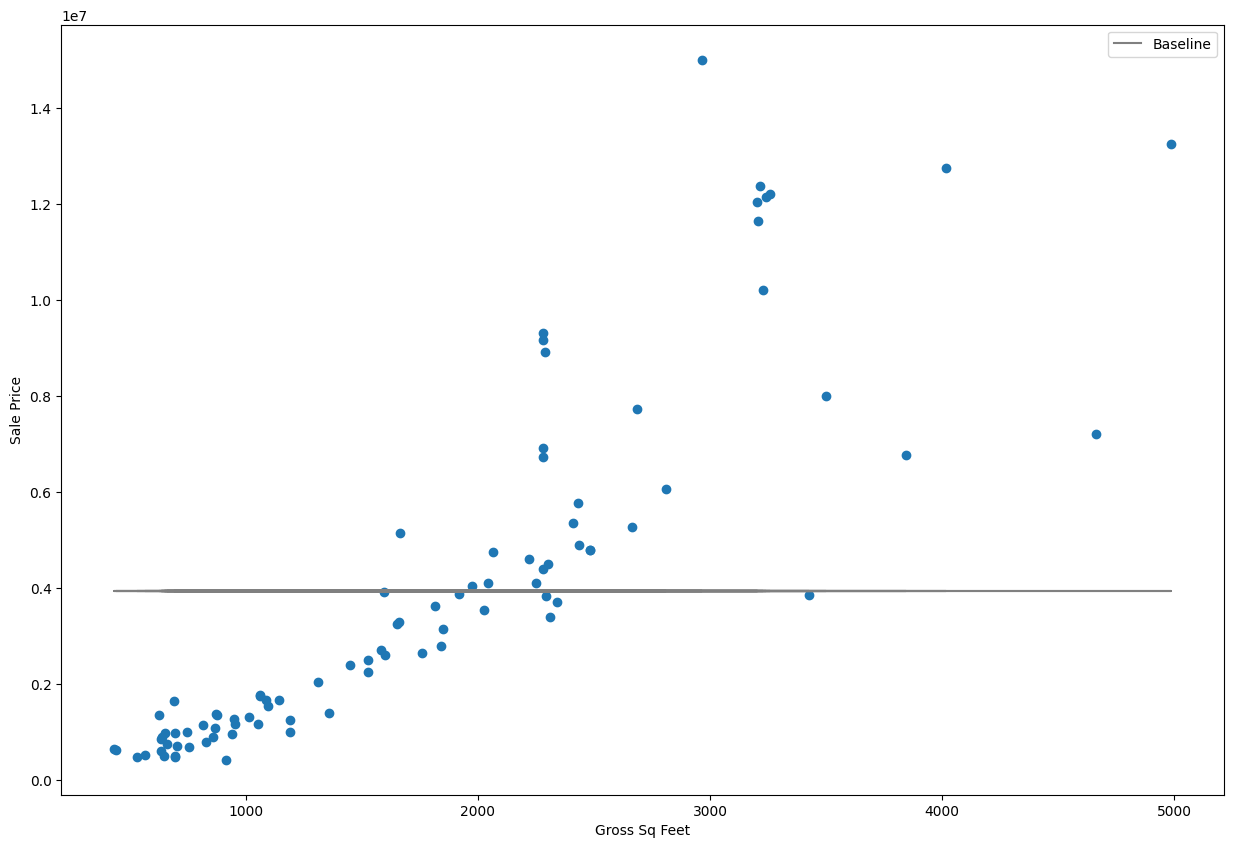

In [23]:
# # Scatter plot to visualize the baseline
plt.figure(figsize=(15, 10))
plt.scatter(X, y)
plt.plot(X, y_baseline_pred, label='Baseline', color='grey')
plt.xlabel('Gross Sq Feet')
plt.ylabel('Sale Price')
plt.legend();

In [29]:
# median_absolute_error
# Use MAE (mean absolute error) to see how the baseline serves as a predictive model, compare actual data points to the line
# MAE = sum of |yi - y^i| / n
print('BASELINE MAE', mean_absolute_error(y, y_baseline_pred))


BASELINE MAE 2783380.1977777784


In [30]:
# we strive to build a model with an MAE that's better than the baseline

# IV. Build Model

In [31]:
# most common is the OLS or ordinary least squares method; OLS minimizes the sum of squared, vertical distances from actual data and the predicted values

In [33]:
# step 1: import predictor class
# look above - from sklearn.linear_model import LinearRegression

#step 2:Instantiate my predictor
model_lr = LinearRegression()

# Step 3: fit my model
model_lr.fit(X, y)

# step 4: make predictions
y_pred_lr = model_lr.predict(X)

# V. Check Metrics

In [35]:
#MAE of LinearRegression model
print('Linear Regression MAE', mean_absolute_error(y, y_pred_lr))
# error reduced by half!

Linear Regression MAE 1176817.9930150746


# VI. Communicate Results

Plot model

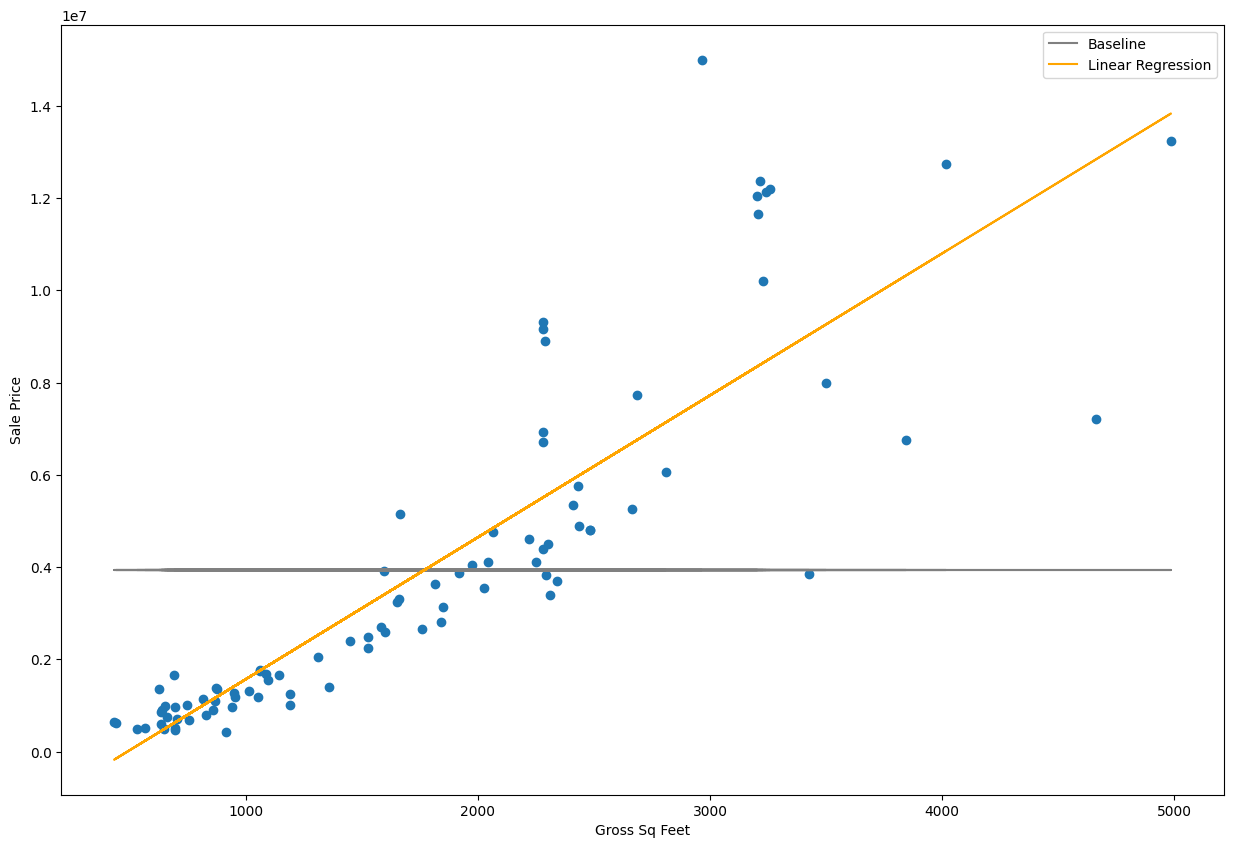

In [37]:
# Plotting baseline and our model to interpret the differences between the two methods.
plt.figure(figsize=(15, 10))
plt.scatter(X, y)
plt.plot(X, y_baseline_pred, label='Baseline', color='grey')
plt.plot(X, y_pred_lr, label='Linear Regression', color='orange')
plt.xlabel('Gross Sq Feet')
plt.ylabel('Sale Price')
plt.legend();

What are our beta coefficients?

In [38]:
intercept = round(model_lr.intercept_)    # the underscore at the end means they're only obtained after the model is run!

In [41]:
model_lr.coef_

array([3076.44765542])

In [42]:
# it's returned as an array, but we want only 1 value, so we need to index it as a 0
coef = round(model_lr.coef_[0])


In [ ]:
# final equation

In [43]:
print(f'SALE_PRICE={intercept} + {coef}*GROSS_SQUARE_FEET')


SALE_PRICE=-1505364 + 3076*GROSS_SQUARE_FEET
